In [3]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
import time
import copy
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [4]:
ox.config(data_folder='data', logs_folder='logs', 
          imgs_folder='imgs', cache_folder='cache',
          use_cache=True, log_console=True, 
          log_name='osmnx', log_file=True, log_filename='osmnx')

crs_osm = {'init':'epsg:4326'}           #crs that osm uses

In [5]:
G_walk = ox.load_graphml('data/networks/Budapest_walk.graphml')
G_walk = ox.project_graph(G_walk,to_crs=crs_osm)

In [6]:
G_bike = ox.load_graphml('data/networks/Budapest_bike_original.graphml')
G_bike = ox.project_graph(G_bike,to_crs=crs_osm)

In [7]:
G_bike_new = ox.load_graphml('data/networks/Budapest_ONLY_Bike_pilot.graphml',node_type=float)
G_bike_new = ox.project_graph(G_bike_new, to_crs=crs_osm)

In [8]:
def euclidean_dist_vec(y1, x1, y2, x2):
    '''
    Calculate the euclidean distance between two points.
    '''
    distance = ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5
    return distance

In [9]:
walk_speed = 5  # about 5 km per hour

# Make a copy of the graph in case we make a mistake
G_walk2 = G_walk.copy()


# Iterate through and convert lengths to seconds
for from_node, to_node in G_walk2.edges():
    for i in G_walk2[from_node][to_node]:
        if G_walk2[from_node][to_node][i]['length'] == 0:
            origin_len = euclidean_dist_vec(G_walk.nodes(data=True)[from_node]['y'],G_walk.nodes(data=True)[from_node]['x'],G_walk.nodes(data=True)[to_node]['y'],G_walk.nodes(data=True)[to_node]['x'])
            G_walk2[from_node][to_node][i]['length'] = orig_len
        else:
            orig_len = G_walk2[from_node][to_node][i]['length']
        G_walk2[from_node][to_node][i]['length_meters'] = orig_len
        # Conversion of walk speed and into seconds from meters
        kmph = (orig_len / 1000) / walk_speed
        in_seconds = kmph * 60 * 60
        G_walk2[from_node][to_node][i]['traverse_time'] = in_seconds
        G_walk2[from_node][to_node][i]['mode'] = 'walk'

In [10]:
bike_speed = 15  # about 15 km per hour

# Make a copy of the graph in case we make a mistake
G_bike2 = G_bike.copy()


# Iterate through and convert lengths to seconds
for from_node, to_node in G_bike2.edges():
    for i in G_bike2[from_node][to_node]:
        if G_bike2[from_node][to_node][i]['length'] == 0:
            origin_len = euclidean_dist_vec(G_bike2.nodes(data=True)[from_node]['y'],G_bike2.nodes(data=True)[from_node]['x'],G_bike2.nodes(data=True)[to_node]['y'],G_bike2.nodes(data=True)[to_node]['x'])
            G_bike2[from_node][to_node][i]['length'] = orig_len
        else:
            orig_len = G_bike2[from_node][to_node][i]['length']
        
        G_bike2[from_node][to_node][i]['length_meters'] = orig_len
        # Conversion of walk speed and into seconds from meters
        kmph = (orig_len / 1000) / bike_speed
        in_seconds = kmph * 60 * 60
        G_bike2[from_node][to_node][i]['traverse_time'] = in_seconds
        G_bike2[from_node][to_node][i]['mode'] = 'bike'

In [11]:
bike_speed = 15  # about 15 km per hour

# Make a copy of the graph in case we make a mistake
G_bike_new_2 = G_bike_new.copy()


# Iterate through and convert lengths to seconds
for from_node, to_node in G_bike_new_2.edges():
    for i in G_bike_new_2[from_node][to_node]:
        if G_bike_new_2[from_node][to_node][i]['length'] == 0:
            origin_len = euclidean_dist_vec(G_bike_new_2.nodes(data=True)[from_node]['y'],G_bike_new_2.nodes(data=True)[from_node]['x'],G_bike_new_2.nodes(data=True)[to_node]['y'],G_bike_new_2.nodes(data=True)[to_node]['x'])
            G_bike_new_2[from_node][to_node][i]['length'] = orig_len
        else:
            orig_len = G_bike_new_2[from_node][to_node][i]['length']
        
        G_bike_new_2[from_node][to_node][i]['length_meters'] = orig_len
        # Conversion of walk speed and into seconds from meters
        kmph = (orig_len / 1000) / bike_speed
        in_seconds = kmph * 60 * 60
        G_bike_new_2[from_node][to_node][i]['traverse_time'] = in_seconds
        G_bike_new_2[from_node][to_node][i]['mode'] = 'bike'

In [12]:
G = nx.compose_all([G_walk2,G_bike2])

In [13]:
missing = [e for e in list(G.edges(data=True)) if e[2]['length'] == 0]

# Make Plots

In [35]:
#fig, axes = plt.subplots(1,3, figsize=(16,9))

formats = ['pdf','png']

G = nx.compose_all([G_walk2,G_pt2,G_bike2])
ec = ['red' if edge['mode']=='bike' else 'blue' if edge['mode']=='transit' else 'lightgray' for i,j,edge in G.edges(data=True)]
ew = [1 if edge['mode']=='bike' else 1.1 if edge['mode']=='transit' else 0.3 for i,j,edge in G.edges(data=True)]
for format_save in formats:
    ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=ew,fig_height=15,save=True, close=True, show=False, filename='networks/Budapest_walk_pt_bike',file_format=format_save)


G = nx.compose_all([G_walk2,G_pt2])
ec = ['red' if edge['mode']=='bike' else 'blue' if edge['mode']=='transit' else 'lightgray' for i,j,edge in G.edges(data=True)]
ew = [1 if edge['mode']=='bike' else 1.1 if edge['mode']=='transit' else 0.3 for i,j,edge in G.edges(data=True)]
for format_save in formats:
    ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=ew,fig_height=15,save=True,close=True, show=False,filename='networks/Budapest_walk_pt',file_format=format_save)

G = G_walk2
ec = ['red' if edge['mode']=='bike' else 'blue' if edge['mode']=='transit' else 'lightgray' for i,j,edge in G.edges(data=True)]
ew = [1 if edge['mode']=='bike' else 1.1 if edge['mode']=='transit' else 0.3 for i,j,edge in G.edges(data=True)]
for format_save in formats:
    ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=ew,fig_height=15, close=True, show=False, save=True,filename='networks/Budapest_walk',file_format=format_save)

G = G_pt2
ec = ['red' if edge['mode']=='bike' else 'blue' if edge['mode']=='transit' else 'lightgray' for i,j,edge in G.edges(data=True)]
ew = [1 if edge['mode']=='bike' else 1.1 if edge['mode']=='transit' else 0.3 for i,j,edge in G.edges(data=True)]
for format_save in formats:
    ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=ew,fig_height=15, close=True, show=False, save=True,filename='networks/Budapest_pt',file_format=format_save)

G = G_bike2
ec = ['red' if edge['mode']=='bike' else 'blue' if edge['mode']=='transit' else 'lightgray' for i,j,edge in G.edges(data=True)]
ew = [1 if edge['mode']=='bike' else 1.1 if edge['mode']=='transit' else 0.3 for i,j,edge in G.edges(data=True)]
for format_save in formats:
    ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=ew,fig_height=15, close=True, show=False, save=True,filename='networks/Budapest_bike',file_format=format_save)


In [14]:
def sanity_check(G):
    wcc = list(nx.weakly_connected_component_subgraphs(G_walk2))
    if len(wcc) > 1:
        wcc.sort(key=len,reverse=True)
        return wcc[0]
    else:
        return G

# Save networks

In [16]:
#G = nx.compose_all([G_walk2,G_bike2])
#G = sanity_check(G)
#ox.save_graphml(G,'data/networks/Budapest_walk_bike_original.graphml')

G = nx.compose_all([G_walk2,G_bike_new_2])
G = sanity_check(G)
ox.save_graphml(G,'data/networks/Budapest_walk_bike_pilot_2.graphml')

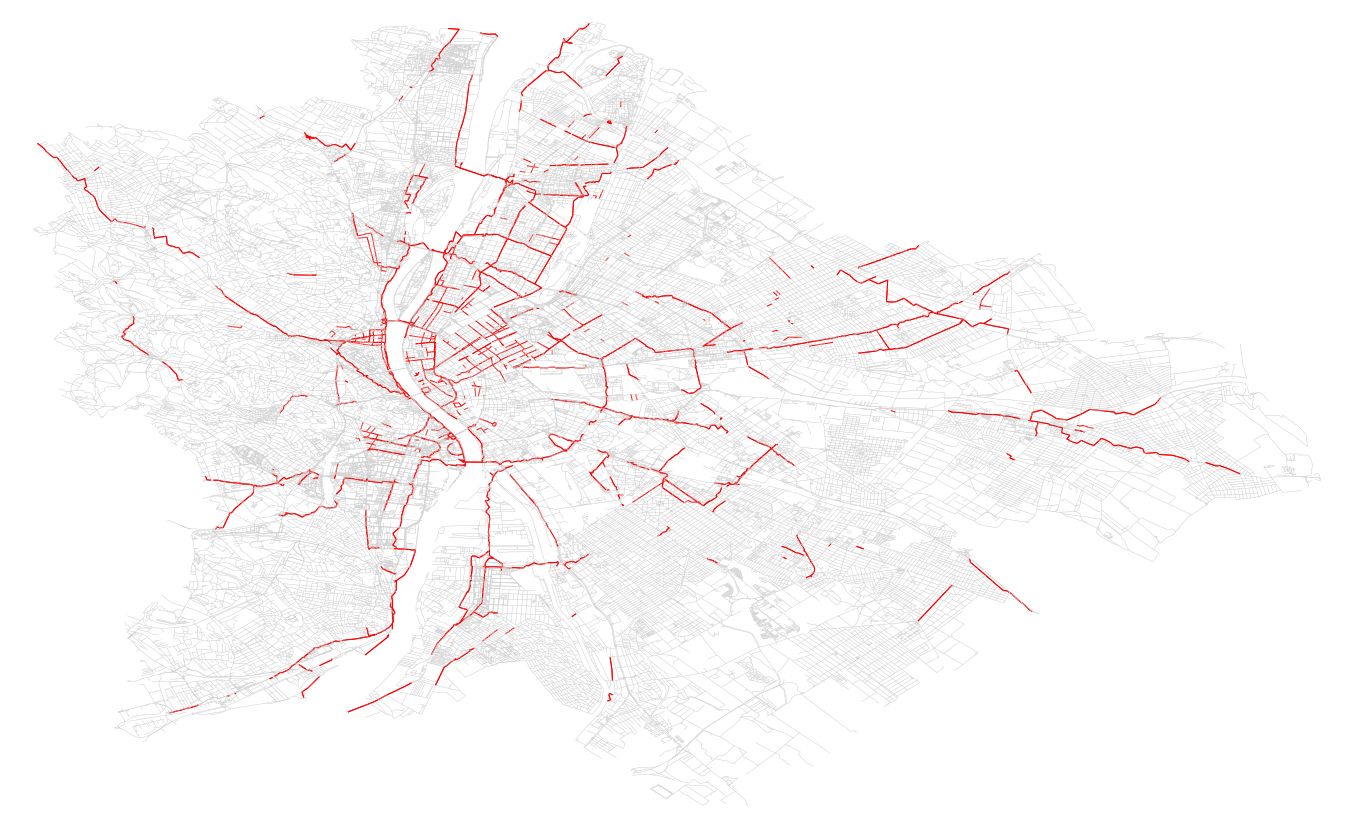

(<Figure size 1728.34x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cd8036a0>)

In [23]:
G = nx.compose_all([G_walk2,G_bike2])
ec = ['red' if edge['mode']=='bike' else 'blue' if edge['mode']=='transit' else 'lightgray' for i,j,edge in G.edges(data=True)]
ew = [1 if edge['mode']=='bike' else 1.1 if edge['mode']=='transit' else 0.3 for i,j,edge in G.edges(data=True)]
#for format_save in formats:
ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=ew,fig_height=15,save=False,close=True, show=True)


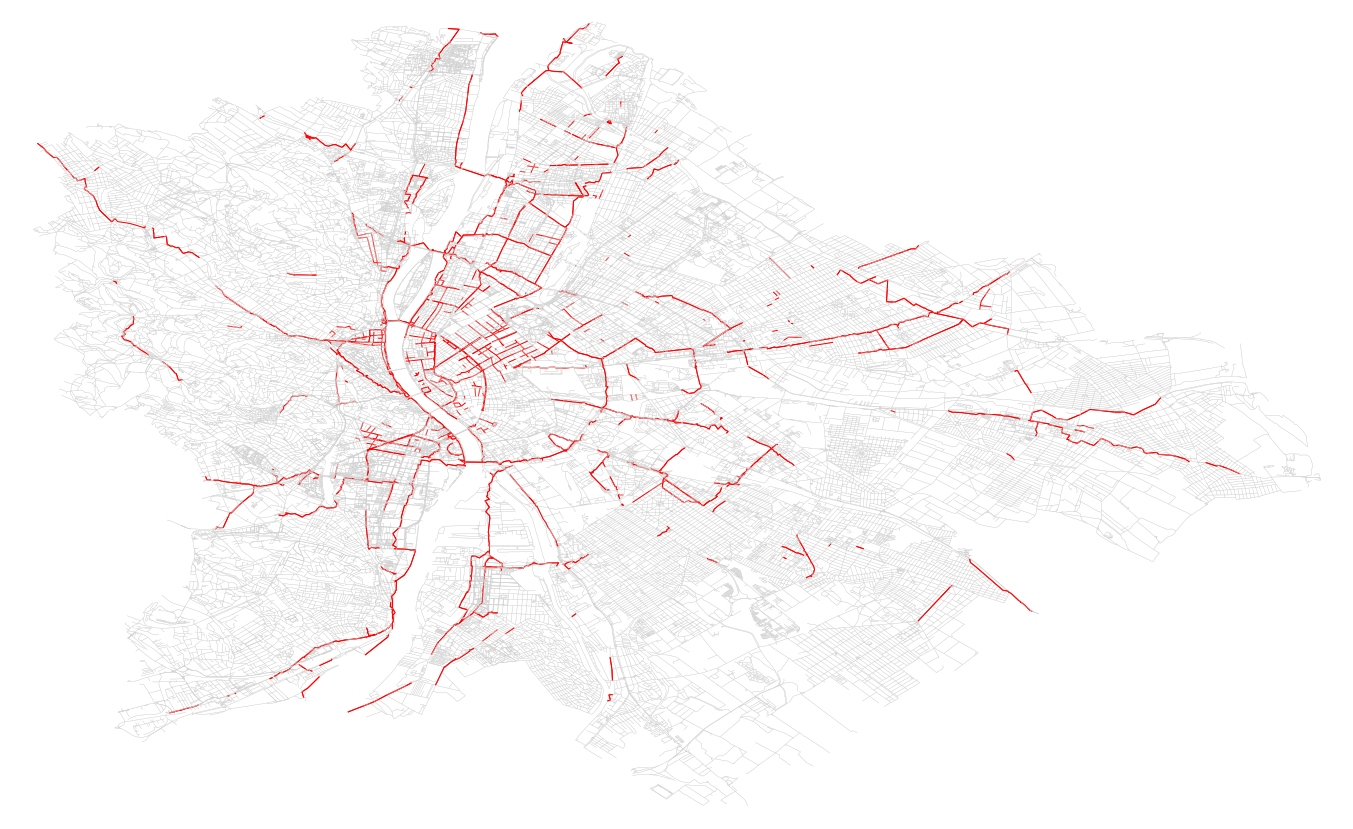

(<Figure size 1728.34x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1cb00e908>)

In [15]:
G = nx.compose_all([G_walk2,G_bike_new_2])
ec = ['red' if edge['mode']=='bike' else 'blue' if edge['mode']=='transit' else 'lightgray' for i,j,edge in G.edges(data=True)]
ew = [1 if edge['mode']=='bike' else 1.1 if edge['mode']=='transit' else 0.3 for i,j,edge in G.edges(data=True)]
#for format_save in formats:
ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=ew,fig_height=15,save=False,close=True, show=True)

In [25]:
G = ox.load_graphml('data/networks/Budapest_walk_bike_pilot.graphml')

ValueError: invalid literal for int() with base 10: '3371479415.0'